In [ ]:
#library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, RocCurveDisplay, accuracy_score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/Machine Learning/Binary Classification of Machine Failures/train.csv")
df_train.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [ ]:
def des_ana(dataframe):
    print("===================== Shape =======================")
    print(f'{dataframe.shape}\n\n')
    print("===================== Columns =======================")
    print(f'{dataframe.columns}\n\n')
    print("===================== Info =======================")
    print(f'{dataframe.info()}\n\n')
    print("===================== Descriptive =======================")
    print(f'{dataframe.describe()}\n\n')
    print("===================== Null Values =======================")
    print(f'{dataframe.isnull().sum()}\n\n')
    print("===================== Unique Values =======================")
    print(f'{dataframe.nunique()}\n\n')

des_ana(df_train)

===================== Shape =======================
(136429, 14)


===================== Columns =======================
Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')


===================== Info =======================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              13

# Handling data


## Removing coluns not necessary

In [ ]:
df_train.drop(["id",'Product ID'], axis=1, inplace=True)
df_train.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


## Label encoder for category columns

In [ ]:
le = LabelEncoder()
df_train['Type'] = le.fit_transform(df_train['Type'])

# Display data

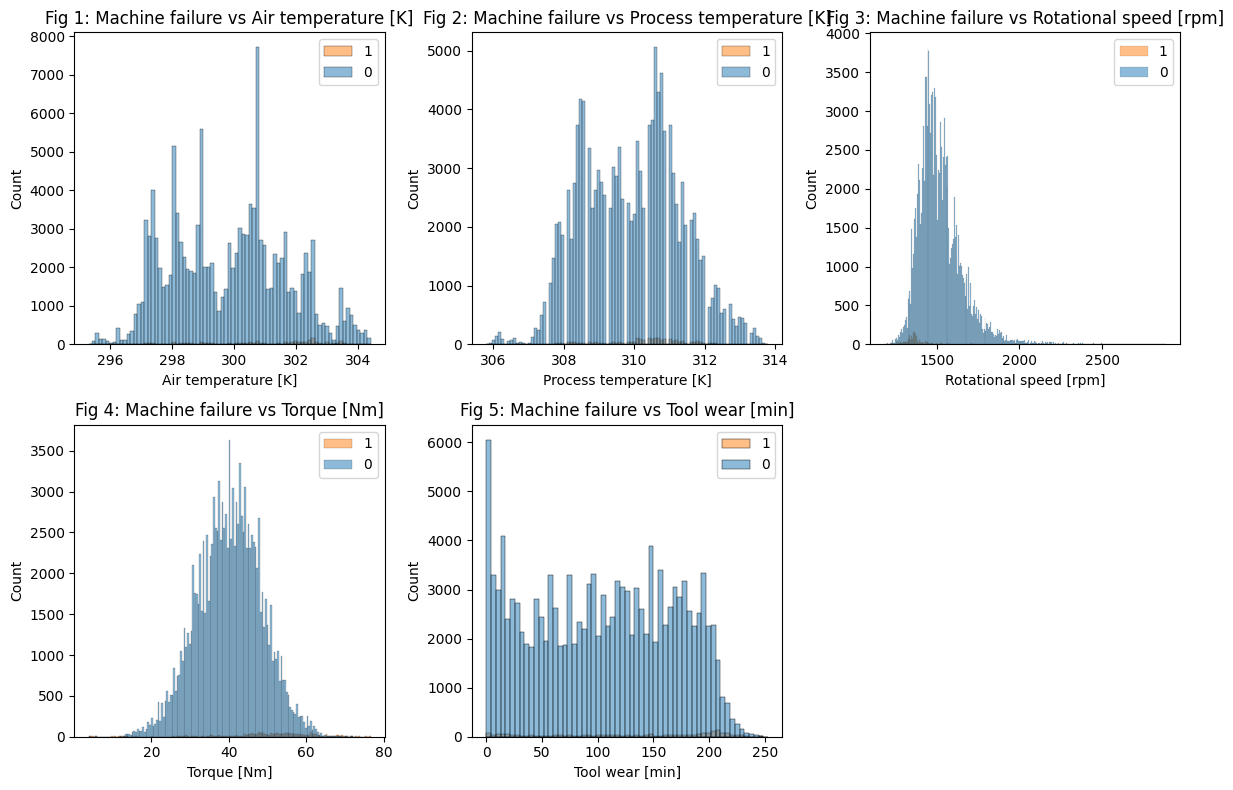

In [ ]:
# Charts of the numerical columns
num_cols = ['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']

n_rows = 2
n_cols = 3
size = 4

fig, ax = plt.subplots(n_rows, n_cols , figsize=(n_cols*size, n_rows*size))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c
        if i < len(num_cols):
            ax_i = ax[r,c]
            sns.histplot(data=df_train, x=num_cols[i], hue='Machine failure', ax=ax_i)
            ax_i.set_title(f"Fig {i+1}: Machine failure vs {num_cols[i]}")
            ax_i.legend(title='', loc='upper right', labels=['1','0'])
ax.flat[-1].set_visible(False) # removing
plt.tight_layout()


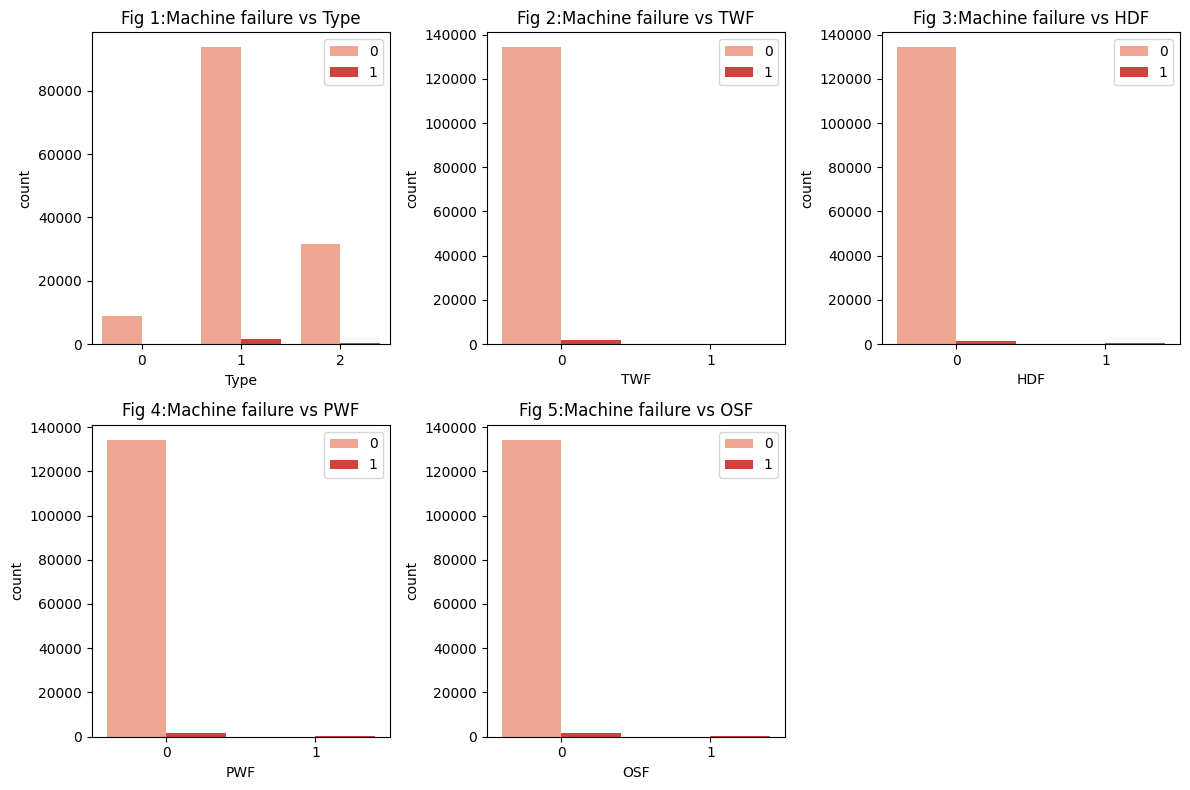

In [ ]:

cat_cols = ['Type', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

n_rows = 2
n_cols = 3
size = 4

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*size, n_rows*size)) # tạo ra từng plot con

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c # chạy qua từng plot
        if i < len(cat_cols):
            ax_i = ax[r,c]
            sns.countplot(data=df_train, x=cat_cols[i], hue="Machine failure", palette="Reds", ax=ax_i)
            ax_i.set_title(f"Fig {i+1}:Machine failure vs {cat_cols[i]}")
            ax_i.legend(title='', loc='upper right', labels=['0','1'])
ax.flat[-1].set_visible(False) # Xóa plot cuối vì bị dư
plt.tight_layout()

In [ ]:
df_train['Machine failure'].value_counts()

0    134281
1      2148
Name: Machine failure, dtype: int64

([<matplotlib.patches.Wedge at 0x78a4bd3fcca0>,
 [Text(-1.0986546702346507, 0.0543867223832346, '0'),
  Text(1.0986546711894103, -0.054386703096333325, '1')],
 [Text(-0.5992661837643549, 0.02966548493630978, '98.4%'),
  Text(0.5992661842851329, -0.02966547441618181, '1.6%')])

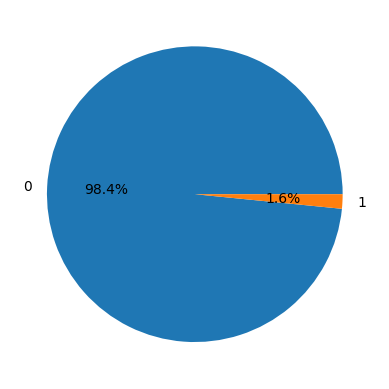

In [ ]:
# Imbalance in 'Machine failure' column
fig, ax = plt.subplots()

sizes=df_train['Machine failure'].value_counts()

ax.pie(sizes, labels=['0', '1'], autopct='%1.1f%%')

# Data preprocessing


In [ ]:
def scale_and_handle_imbalance(dataframe):

    # Split data into features and target.
    X = df_train.drop('Machine failure', axis=1).values
    y = df_train['Machine failure'].values

    # Scale consistent columns (nummerical columns).
    ct = ColumnTransformer(
        [('scale', MinMaxScaler(), slice(1,6))],
        remainder='passthrough'
    )
    X[:,1:5] = ct.fit_transform(X[:,1:5])

    # Handle imbalance data.
    smote = SMOTE()
    X ,y = smote.fit_resample(X,y)

    return X, y

X, y = scale_and_handle_imbalance(df_train)

# Baseline model comparion by cross-validation

In [ ]:
seed = 42

models = [
    LogisticRegression(solver='liblinear', max_iter=1000),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    KNeighborsClassifier(metric='minkowski', p=2),
    XGBClassifier(eval_metric='logloss', random_state=seed),
    LGBMClassifier()
]

from sklearn.model_selection import StratifiedKFold

def generate_baseline_results(models, X, y, metrics, cv=5):
    kfold = StratifiedKFold(cv, shuffle=True, random_state=seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__                               # get the names of the algorithms
        scores = cross_val_score(model, X, y, scoring=metrics, cv=kfold)    # compute accuracy of algorithms
        for fold_idx, score in enumerate(scores):                           # enumerate() use to sign index
            entries.append((model_name, fold_idx, score))

    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_id', 'accuracy_score'])

    # Sumary results
    mean = cv_df.groupby('model_name')['accuracy_score'].mean()
    std = cv_df.groupby('model_name')['accuracy_score'].std()

    baseline_results = pd.concat([mean, std], axis=1, ignore_index=True)
    baseline_results.columns = ['Mean', 'Standard Deviation']

    # Sort by accuracy
    baseline_results.sort_values(by=['Mean'], ascending=False, inplace=True)

    return baseline_results

generate_baseline_results(models, X,y, metrics='accuracy', cv=5)

,Mean,Standard Deviation
model_name,,
RandomForestClassifier,0.994575,0.000377
XGBClassifier,0.994444,0.000529
KNeighborsClassifier,0.989961,0.000518
DecisionTreeClassifier,0.988774,0.000544
LGBMClassifier,0.988096,0.000721
GradientBoostingClassifier,0.961815,0.000332
AdaBoostClassifier,0.959857,0.000183
LogisticRegression,0.936841,0.001086


#  Hypertuning parameter

In [ ]:
hyper_models = {
    'Decision Tree':{
        'model':DecisionTreeClassifier(random_state=seed),
        'params':{
            'criterion':['gini', 'entropy', 'log_loss'],
            'max_depth':[5,8,10]
        }
    },
    'Random Forest':{
        'model':RandomForestClassifier(random_state=seed),
        'params':{
            'criterion':['gini', 'entropy', 'log_loss'],
            'max_depth':[5,8,10]
        }
    },
    'XGBoots':{
        'model': XGBClassifier(random_state=seed),
        'params':{
            'n_estimators':[1,10,100,1000]
        }
    },
    'LGB':{
        'model': LGBMClassifier(random_state=seed),
        'params':{
            'n_estimators':[1,10,100,1000]
        }
    },
    'K Neighbors':{
        'model': KNeighborsClassifier(),
        'params':{
            'n_neighbors':[2,3,5],
            'weights': ['uniform', 'distance']
        }
    }
}

scores = []

for model_name, mp in hyper_models.items():
    clf = GridSearchCV(mp['model'], mp['params'], return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model':model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

results_train = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
results_train

,model,best_score,best_params
0,Decision Tree,0.958944,"{'criterion': 'entropy', 'max_depth': 10}"
1,Random Forest,0.956651,"{'criterion': 'gini', 'max_depth': 10}"
2,XGBoots,0.997658,{'n_estimators': 1000}
3,LGB,0.997237,{'n_estimators': 1000}
4,K Neighbors,0.994791,"{'n_neighbors': 2, 'weights': 'distance'}"


# Validation


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=seed)

def val_model(model, X_train, X_val, y_train, y_val):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print(classification_report(y_val, y_pred))

In [ ]:
# XGBoots
val_model(XGBClassifier(n_estimators=1000), X_train, X_val, y_train, y_val)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40128
           1       1.00      1.00      1.00     40441

    accuracy                           1.00     80569
   macro avg       1.00      1.00      1.00     80569
weighted avg       1.00      1.00      1.00     80569



In [ ]:
# LGBM
val_model(LGBMClassifier(n_estimators=1000), X_train, X_val, y_train, y_val)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40128
           1       1.00      1.00      1.00     40441

    accuracy                           1.00     80569
   macro avg       1.00      1.00      1.00     80569
weighted avg       1.00      1.00      1.00     80569



In [ ]:
# KNN
val_model(KNeighborsClassifier(n_neighbors=2, weights='distance'), X_train, X_val, y_train, y_val)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     40128
           1       0.99      1.00      0.99     40441

    accuracy                           0.99     80569
   macro avg       0.99      0.99      0.99     80569
weighted avg       0.99      0.99      0.99     80569



In [ ]:
# Random forest
val_model(RandomForestClassifier(criterion='entropy', max_depth=10), X_train, X_val, y_train, y_val)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     40128
           1       1.00      0.92      0.96     40441

    accuracy                           0.96     80569
   macro avg       0.96      0.96      0.96     80569
weighted avg       0.96      0.96      0.96     80569



# Data preprocessing for test data

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Machine Learning/Binary Classification of Machine Failures/test.csv')
df_test.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [ ]:
df_test.drop(["id",'Product ID'], axis=1, inplace=True)
le = LabelEncoder()
df_test['Type'] = le.fit_transform(df_test['Type'])

In [ ]:
df_test.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,1,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,1,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,1,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,2,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,2,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [ ]:
X_test = df_test.values

In [ ]:
ct = ColumnTransformer(
        [('scale', MinMaxScaler(), slice(1,6))],
        remainder='passthrough'
    )
X_test[:,1:5] = ct.fit_transform(X_test[:,1:5])

# Final train

In [ ]:
rf = RandomForestClassifier(criterion='entropy', max_depth=10)
rf.fit(X,y)
y_pred = rf.predict(X_test)

In [ ]:
df_submit = pd.read_csv('/content/drive/MyDrive/Machine Learning/Binary Classification of Machine Failures/sample_submission.csv')
df_submit.head()

,id,Machine failure
0,136429,0.5
1,136430,0.5
2,136431,0.5
3,136432,0.5
4,136433,0.5


In [ ]:
ids = df_submit['id']

In [ ]:
pd.DataFrame(zip(ids,y_pred),columns=['id','Machine failure']).to_csv("submission.csv", index=False)